Combinaison des codes de Polizzi Victor du stage 2018 (Lis).
Par: Polizzi Victor
Le 01/03/2019
Dernière modification: 19/02/2019 

# Chargement des modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.colors as mcolors
import scipy as s
import h5py 
import numpy as np
import matplotlib.pyplot as plt
import tables
from scipy.stats import shapiro
from scipy.stats import norm
from math import floor 


## Chargement données

In [2]:
#use var=pd.read_csv('File_Name.csv') to open a csv file in the variable var
data=pd.read_csv('tdoa_sess_4.csv')#
data['click_time']=pd.to_datetime(data['click_time'])

In [34]:
data

click_time  click_value      ipi  ipi_salience  \
0      2017-08-04 13:20:01.397540     0.010111  0.00350      0.227943   
1      2017-08-04 13:20:09.713460     0.013656  0.00508      0.283639   
2      2017-08-04 13:20:14.627380     0.007438  0.00220      0.439669   
3      2017-08-04 13:20:15.686440     0.014127  0.00458      0.200307   
4      2017-08-04 13:20:22.731621     0.009257  0.00268      0.364003   
5      2017-08-04 13:20:30.530199     0.016912  0.00660      0.102172   
6      2017-08-04 13:20:48.725460     0.009546  0.00252      0.086562   
7      2017-08-04 13:20:51.037060     0.007570  0.00650      0.237333   
8      2017-08-04 13:20:54.239578     0.007626  0.00526      0.151219   
9      2017-08-04 13:20:57.209240     0.009954  0.00320      0.211354   
10     2017-08-04 13:20:58.385559     0.017861  0.00612      0.259402   
11     2017-08-04 13:21:03.519241     0.010269  0.00736      0.303302   
12     2017-08-04 13:21:06.619240     0.015916  0.00592      0.131800   
13     2017-08-04 13:21:15.643700     0.009273  0.00706      0.155027   
14     2017-08-04 13:21:17.671303     0.006802  0.00514      0.282123   
15     2017-08-04 13:21:19.751137     0.010445  0.00210      0.230024   
16     2017-08-04 13:21:25.640900     0.012664  0.00214      0.215393   
17     2017-08-04 13:21:27.627319     0.007823  0.00636      0.246899   
18     2017-08-04 13:21:28.492958     0.014484  0.00454      0.170751   
19     2017-08-04 13:21:31.846939     0.020285  0.00700      0.091330   
20     2017-08-04 13:21:33.536537     0.009117  0.00530      0.233229   
21     2017-08-04 13:21:33.882423     0.017678  0.00768      0.083909   
22     2017-08-04 13:21:36.792503     0.010092  0.00268      0.218034   
23     2017-08-04 13:21:36.849159     0.010436  0.00764      0.239812   
24     2017-08-04 13:21:37.452843     0.015251  0.00658      0.127380   
25     2017-08-04 13:21:40.069542     0.007472  0.00530      0.431064   
26     2017-08-04 13:21:40.251038     0.005915  0.00558      0.176699   
27     2017-08-04 13:21:40.934464     0.017879  0.00660      0.179872   
28     2017-08-04 13:21:41.682022     0.007109  0.00778      0.214724   
29     2017-08-04 13:21:47.710083     0.016095  0.00670      0.223642   
...                           ...          ...      ...           ...   
982539 2017-08-31 23:44:52.466522     0.032650  0.00538      0.141652   
982540 2017-08-31 23:44:53.190948     0.016718  0.00580      0.117528   
982541 2017-08-31 23:44:53.532501     0.020014  0.00206      0.088345   
982542 2017-08-31 23:44:53.615387     0.021601  0.00742      0.157889   
982543 2017-08-31 23:44:53.649780     0.041304  0.00200      0.186160   
982544 2017-08-31 23:44:53.692108     0.022608  0.00706      0.194224   
982545 2017-08-31 23:44:53.957520     0.013131  0.00208      0.170811   
982546 2017-08-31 23:44:54.378113     0.029283  0.00222      0.098549   
982547 2017-08-31 23:44:54.486969     0.029833  0.00338      0.159431   
982548 2017-08-31 23:44:54.786255     0.025001  0.00264      0.081935   
982549 2017-08-31 23:44:54.943848     0.031130  0.00236      0.087009   
982550 2017-08-31 23:44:55.189758     0.036172  0.00792      0.105460   
982551 2017-08-31 23:44:55.272736     0.038410  0.00266      0.084094   
982552 2017-08-31 23:44:55.357483     0.036680  0.00238      0.122658   
982553 2017-08-31 23:44:55.417603     0.034407  0.00200      0.229658   
982554 2017-08-31 23:44:55.438629     0.027237  0.00332      0.100077   
982555 2017-08-31 23:44:55.520294     0.029404  0.00338      0.101031   
982556 2017-08-31 23:44:55.600861     0.030243  0.00418      0.086723   
982557 2017-08-31 23:44:55.680145     0.025240  0.00230      0.117288   
982558 2017-08-31 23:44:55.916046     0.024589  0.00332      0.102076   
982559 2017-08-31 23:44:56.429474     0.023726  0.00236      0.111841   
982560 2017-08-31 23:44:57.447266     0.033295  0.00250      0.082832   
982561 2017-08-31 23:44:57.533600     0.038219  0.00262      0.119165   
982562 2

## Affichage données brutes

(736571.0, 736572.0)

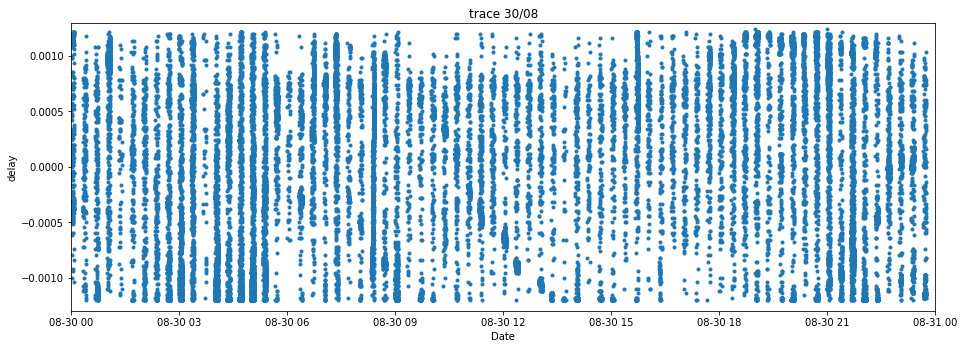

In [12]:
yr=2017
mth=8
da=30


cc1=data.loc[(data['click_time']>='%d-%d-%d 00:00:00.0'%(yr,mth,da))
             &(data['click_time']<'%d-%d-%d 00:00:00'%(yr,mth,da+1))
             #&(data['ipi']>0.0048)&(data['ipi']<0.0055)

             ]


plt.plot(cc1['click_time'],cc1['tdoa'],'.')
plt.subplots_adjust(top=1, bottom=0, left=0, right=2, hspace=0.25,wspace=0.15)
plt.title("trace %d/08"%(da))
plt.xlabel('Date')
plt.ylabel('delay')
plt.ylim([-0.0013,0.0013])
plt.xlim(['2017-08-%d 00:00:00.0'%(da),'2017-08-%d 00:00:00'%(da+1)])

# Traitement

In [4]:
#On cherche à sélectionner les données qui posèdent une densité de 'clic détecté' assez haut(limite à définir). 
#Les bruits de fond seront éliminés (plus ou moins), et les traces plus lisibles.

In [5]:
#Uniquement pour test = limiter la quantité de données à calculer à un jour.
data=cc1.reset_index(drop = True)

NameError: name 'cc1' is not defined

In [6]:
#on fixe les variables de temps au T0 des données (on peut aussi fixer les dates de départ et de fin)
d0=data.loc[0]['click_time']#On prend la date de la première détection
T0=pd.to_datetime('%d-%d-%d 00:00:00'%(d0.year,d0.month,d0.day))#On modifie l'heure à 00:00:00 et on le met dans T0
Tt=data.loc[data.shape[0]-1]['click_time']#On prend la dernière détection 

dt20=pd.to_timedelta('00:20:00')#à chaque tour de boucle on avance T0 de 20 minutes
sep=0.00001#taille des segments de TDOA en seconde a:0.0001  b:0.00001
TDOAsep=np.arange(-0.0013,0.0013,sep)# on sépare la gamme des TDOA en unités de 0.0001s
Dlim=0.06#Densité minimale pour que les points soient validés a:0.15~0.25  b:0.06
data2=pd.DataFrame()#Initialisation du dataframe vide pour les données filtrées

#Boucle
for i in np.arange(T0,Tt,dt20):#i allant de T0 à Tt par increments de 20 minutes
    dtemp1=data.loc[(data['click_time']>=i)
                    &(data['click_time']<i+dt20)
                    ]#On isole data entre i et i+20mins
    
    if dtemp1.shape[0]>0:
        nbtotal=dtemp1.shape[0]#Nombre total de clic dans le dataframe (nb de lignes)

        for j in TDOAsep:
            dtemp2=dtemp1.loc[(dtemp1['tdoa']>=j)
                           &(dtemp1['tdoa']<=j+sep)
                          ]#On isole data  dans l'interval de TDOA entre j et j+sep dans dtemp
            
            if dtemp2.shape[0]>0:
                D=(dtemp2.shape[0])/nbtotal#calcul de la densité de pts dan l'intelval de TDOA donné par rapport au nb total de pts
                if D>Dlim:
                    data2=pd.concat([data2,dtemp2], ignore_index = True)

#Affichage pour verification
ccc1=data2.loc[(data2['click_time']>='2017-08-%d 00:00:00.0'%(da))
              &(data2['click_time']<'2017-08-%d 00:00:00'%(da+1))
             ]
ccc1=ccc1.reset_index(drop=True)
plt.plot(ccc1['click_time'],ccc1['tdoa'],'.')
plt.subplots_adjust(top=1, bottom=0, left=0, right=2, hspace=0.25,wspace=0.15)
plt.title("trace %d/08"%(da))
plt.xlabel('Date')
plt.ylabel('delay')
plt.ylim([-0.0013,0.0013])
plt.xlim(['2017-08-%d 00:00:00.0'%(da),'2017-08-%d 00:00:00'%(da+1)])
plt.grid()

NameError: name 'da' is not defined

In [9]:
data2.to_csv('data2.csv')

# Isolation de traces à la main

In [10]:
#L'isolation se fait à la main (pas trouver de moyen automatique, trop compliquer)
#après le traitement précédent on observe le TDOA jour après jour pour identifier a la main les track
#On note les limites en TDOA pour chaque block appartenant à la même track
#on les sépares dans un DataFrame séparé et spécifique à chaque teack 

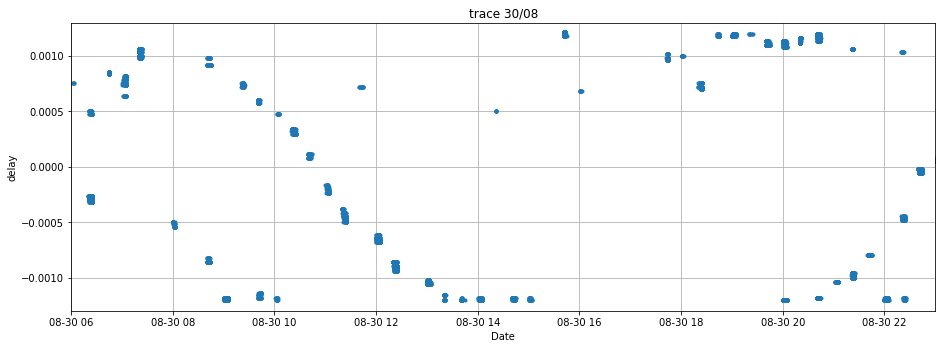

In [33]:
# Exemple d'une trck simple


da=30
ccc1=data2.loc[(data2['click_time']>='2017-08-%d 00:00:00.0'%(da))
               &(data2['click_time']<'2017-08-%d 00:00:00'%(da+1))
               #&(data2['ipi']>0.0048)&(data2['ipi']<0.0055)
             ]



plt.figure()
plt.plot(ccc1['click_time'],ccc1['tdoa'],'.')
plt.subplots_adjust(top=1, bottom=0, left=0, right=2, hspace=0.25,wspace=0.15)
plt.title("trace %d/08"%(da))
plt.xlabel('Date')
plt.ylabel('delay')
plt.ylim([-0.0013,0.0013])
plt.xlim(['2017-08-%d 06:00:00.0'%(da),'2017-08-%d 23:00:00'%(da)])
plt.grid()

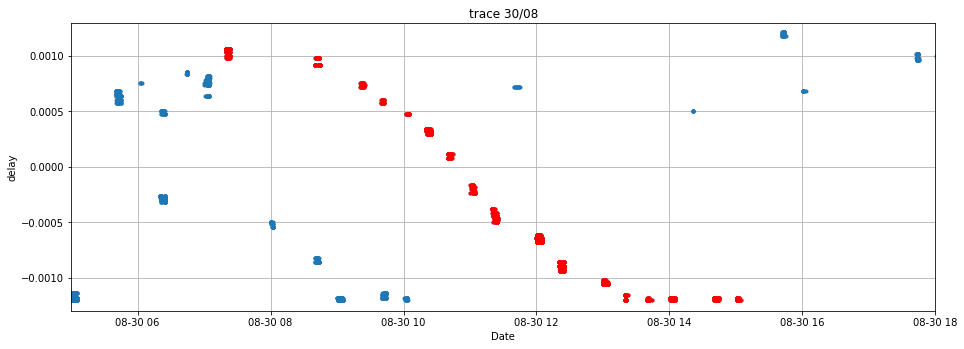

In [24]:
a=data2.loc[(data2['click_time']>='2017-08-%d 07:20:00.0'%(da))
            &(data2['click_time']<'2017-08-%d 10:20:00.0'%(da))
            &(data2['tdoa']>0)]

b=data2.loc[(data2['click_time']>='2017-08-%d 10:20:00.0'%(da))
            &(data2['click_time']<'2017-08-%d 11:00:00.0'%(da))]

c=data2.loc[(data2['click_time']>='2017-08-%d 11:00:00.0'%(da))
            &(data2['click_time']<'2017-08-%d 15:20:00.0'%(da))
            &(data2['tdoa']<0)]

Track1=pd.concat([a,b,c])

plt.figure()
plt.plot(ccc1['click_time'],ccc1['tdoa'],'.')
plt.plot(Track1['click_time'],Track1['tdoa'],'.',color='r')
plt.subplots_adjust(top=1, bottom=0, left=0, right=2, hspace=0.25,wspace=0.15)
plt.title("trace %d/08"%(da))
plt.xlabel('Date')
plt.ylabel('delay')
plt.ylim([-0.0013,0.0013])
plt.xlim(['2017-08-%d 05:00:00.0'%(da),'2017-08-%d 18:00:00'%(da)])
plt.grid()


## Calcul des pentes (direction / vitesse / distance)

In [13]:
# Deux possiiliés:
# 1: La pente est calculé le plus prés possible de TDOA=0 la ou la pente est la plus forte.
# 2: La pente est calculé en prenant les points au début des pentes entre la partie plate et la partie pente.
# La seconde technique est plus simple mais moins précise que la première. Elle et cependant interessante
# en cas de perte ou manque de données au niveau TDOA=0

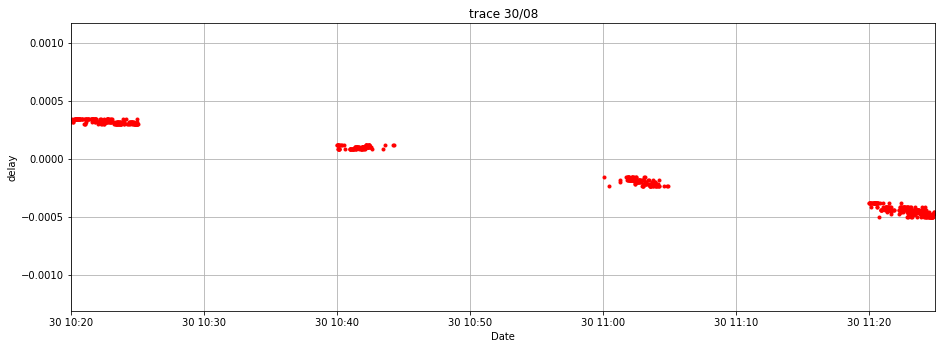

In [14]:
plt.figure()

plt.plot(Track1['click_time'],Track1['tdoa'],'.',color='r')
plt.subplots_adjust(top=1, bottom=0, left=0, right=2, hspace=0.25,wspace=0.15)
plt.title("trace %d/08"%(da))
plt.xlabel('Date')
plt.ylabel('delay')
#plt.ylim([-0.0005,-0.0004])
plt.xlim(['2017-08-%d 10:20:00.0'%(da),'2017-08-%d 11:25:00'%(da)])
plt.grid()


In [15]:
# on utilise les points à 10:20 et 11:25 ou 10:40 et 11:05 
yA=0.000325
yB=-0.00046

xA=pd.to_datetime('10:22:30')
xB=pd.to_datetime('11:22:30')

dy=yB-yA
dx=xB-xA

In [16]:
pente=dy/(dx.seconds/(3600))
print('pente :', pente, 's/heure')

pente : -0.000785 s/heure


In [17]:
# Pour détemrminer la direction on observe le signe de la pente. 
# Si la pente est négative : E -> O
# Si la pente est positive : O -> E
# à verifier

In [18]:
t=Track1.loc[(Track1['click_time']>='2017-08-%d 10:20:00.0'%(da))&(Track1['click_time']<'2017-08-%d 11:25:00.0'%(da))]

## Calcul ICI (interval inter clic) d'une track isolée

In [19]:
# L'ICI permet d'observer le comportement de l'animal, In ICI de 0.5 secondes environ correspond à un comportement de recherche de proie
# Un ici très court correspond à une chasse active (prés d'une proie déja localisée)

## PAS FINI!!!!!

In [20]:
Track1
Tracka=Track1.sort_values(by = 'click_time')
Tracka=Tracka.reset_index(drop=False)


In [21]:

T1=pd.concat([pd.DataFrame(Tracka.iloc[0]).T,Tracka],ignore_index=True)
T2=pd.concat([Tracka,pd.DataFrame(Tracka.iloc[Tracka.shape[0]-1]).T],ignore_index=True)
#T2=Tracka.loc[1:].reset_index(drop=True)


In [1]:
ICI1=T2['click_time']-T1['click_time']

NameError: name 'T2' is not defined

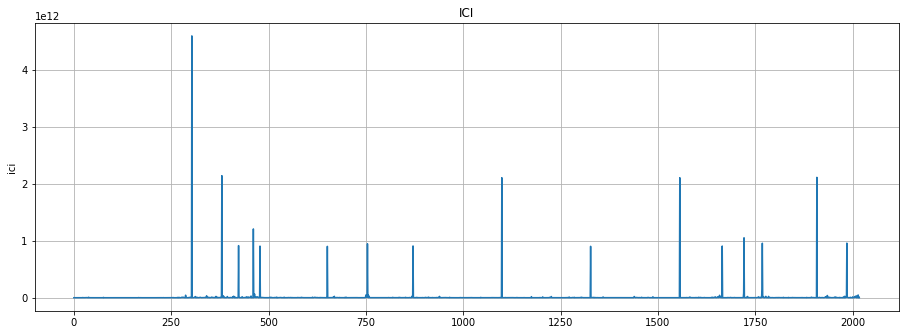

In [25]:
plt.figure()

plt.plot(ICI1)
plt.subplots_adjust(top=1, bottom=0, left=0, right=2, hspace=0.25,wspace=0.15)
plt.title("ICI")
plt.xlabel('')
plt.ylabel('ici')
#plt.ylim([-0.0005,-0.0004])
#plt.xlim(['2017-08-%d 10:20:00.0'%(da),'2017-08-%d 11:25:00'%(da)])
plt.grid()
